# DNN for regression problem

In [87]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chainer
import chainer.functions as F
import chainer.links as L

from chainer import training
from chainer.training import extensions

In [77]:
df = pd.read_csv('/Users/MEO/Documents/self_study/data/housing.csv')

x = df.iloc[:, :-1].values.astype('f')
t = df.iloc[:, -1].values.astype('f').reshape(-1,1)

dataset = list(zip(x, t))
n_train = int(len(dataset)*0.7)

train, test = chainer.datasets.split_dataset_random(dataset, n_train, seed=0)

In [78]:
x.shape

(506, 13)

## モデル定義

### Method1

In [79]:
x.shape

(506, 13)

In [102]:
class NN(chainer.Chain):
    def __init__(self, n_in=13, h1_nodes=10, h2_nodes=10, n_out=1):
        super().__init__()
        with self.init_scope():
            self.bn = L.BatchNormalization(n_in)
            self.layer1 = L.Linear(None, h1_nodes)
            self.layer2 = L.Linear(None, h2_nodes)
            self.layer3 = L.Linear(None, n_out)
    
    def __call__(self, x):
        h = self.bn(x)
        h = self.layer1(h)
        h = F.relu(h)
        h = self.layer2(h)
        h = F.relu(h)
        h = self.layer3(h)
        return h

np.random.seed(0)
nn = NN()
model = L.Classifier(nn, lossfun=F.mean_squared_error)
model.compute_accuracy = False

### Method2

In [103]:
# class NN(chainer.Chain):
#     def __init__(self, h1_nodes=10, n_out=1):
#         super().__init__()
#         with self.init_scope():
#             self.layer1 = L.Linear(None, h1_nodes)
#             self.layer2 = L.Linear(None, n_out)
    
#     def __call__(self, x, t):
#         y = self.predictor(x)
#         loss = F.mean_squared_error(t, y)
#         chainer.report({'loss': loss}, self)
#         return loss
    
#     def predictor(self, x):
#         h = self.layer1(x)
#         h = F.relu(h)
#         h = self.layer2(h)
#         return h

# np.random.seed(0)
# model = NN()

## 訓練

In [104]:
optimizer = chainer.optimizers.Adam()
optimizer.setup(model)

In [105]:
epoch = 100
batch_size = 10

train_iter = chainer.iterators.SerialIterator(train, batch_size)
test_iter = chainer.iterators.SerialIterator(test, batch_size, repeat=False, shuffle=False)

updater = training.StandardUpdater(train_iter, optimizer, device=-1)
trainer = training.Trainer(updater, (epoch, 'epoch'), out='result/housing')

trainer.extend(extensions.Evaluator(test_iter, model, device=-1))
trainer.extend(extensions.LogReport(trigger=(1, 'epoch')))
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'validation/main/loss', 'elapsed_time']))

trainer.run()

epoch       main/loss   validation/main/loss  elapsed_time
1           559.767     584.593               0.17573       
2           536.303     547.992               0.323122      
3           492.607     490.167               0.475411      
4           415.619     373.921               0.625888      
5           294.913     232.919               0.782505      
6           186.599     151.524               0.928693      
7           134.586     122.312               1.09232       
8           108.222     101.314               1.24355       
9           90.7699     87.294                1.38864       
10          88.8545     78.5097               1.53119       
11          89.4191     70.7347               1.6769        
12          70.5738     64.7039               1.81841       
13          56.49       59.225                1.96657       
14          57.5219     54.9258               2.10781       
15          60.803      48.3762               2.25055       
16          53.0819     44

# Visualization

In [106]:
with open('result/housing/log') as f:
    logs = json.load(f)
    result = pd.DataFrame(logs)

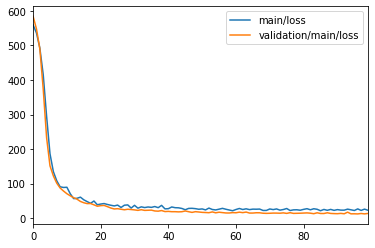

In [107]:
result[["main/loss", "validation/main/loss"]].plot()

In [92]:
np.sqrt(result['validation/main/loss'].values[-1])

4.2190989879796